This file contains simulated EEG data with columns representing time points and a "Label" column where:

1 indicates the presence of an error-related potential (ERP).
0 indicates no ERP.

# Importing Libriries
These libraries provide the basic functionality you’ll need to load the data, visualize EEG signals, apply LDA for pattern separation, and evaluate classification performance.

In [1]:
import numpy as np               # For numerical operations
import pandas as pd              # For data handling and manipulation
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA classification
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluation metrics

To display the raw sample EEG data without applying LDA

1. Loads the EEG dataset.
2. Selects a few random samples from the dataset.
3. Plots each sample on a separate subplot with its label to indicate whether it has an ERP (label 1) or not (label 0).

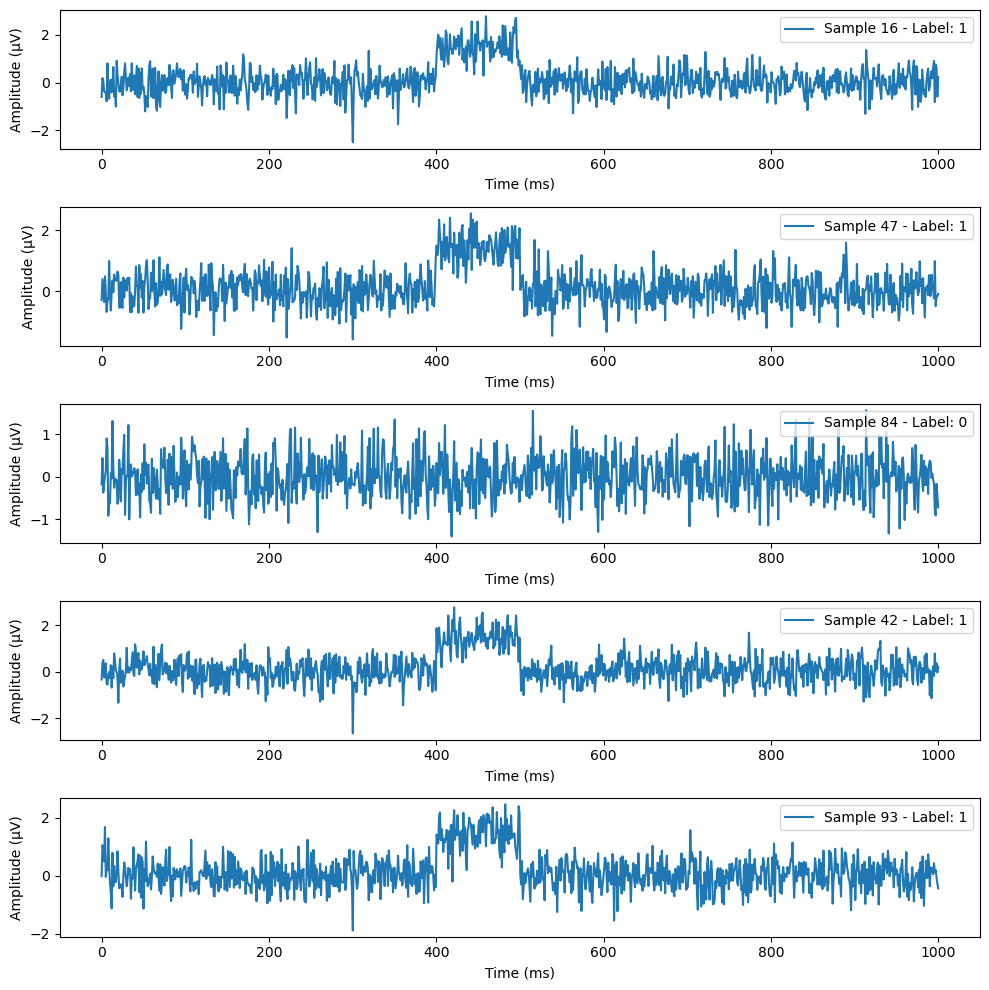

In [2]:
# Load the EEG dataset
eeg_dataset = pd.read_csv("C:/Users/LENOVO/Downloads/eeg_dataset (1).csv")

# Separate the data and labels
eeg_data = eeg_dataset.drop(columns=['Label']).values  # EEG signals
labels = eeg_dataset['Label'].values  # Labels (1 for ERP, 0 for no ERP)

# Plotting a few random samples from the dataset
num_samples_to_display = 5  # Number of samples to display
time_ms = np.linspace(0, 1000, eeg_data.shape[1])  # Time axis in milliseconds

plt.figure(figsize=(10, num_samples_to_display * 2))
for i in range(num_samples_to_display):
    plt.subplot(num_samples_to_display, 1, i + 1)
    sample_idx = np.random.randint(0, eeg_data.shape[0])  # Randomly select a sample
    plt.plot(time_ms, eeg_data[sample_idx], label=f"Sample {sample_idx} - Label: {labels[sample_idx]}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (µV)")
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Apply LDA
To apply Linear Discriminant Analysis (LDA) to separate features between EEG signals with and without error-related potentials (ERPs), here’s a step-by-step approach:

1. Prepare the Data: Split the EEG signals (features) and labels.
2. Apply LDA: Train the LDA model on the data to find a linear combination of features that best separates the two classes.
3. Plot Results: Project the data onto the LDA component to visualize the separation.

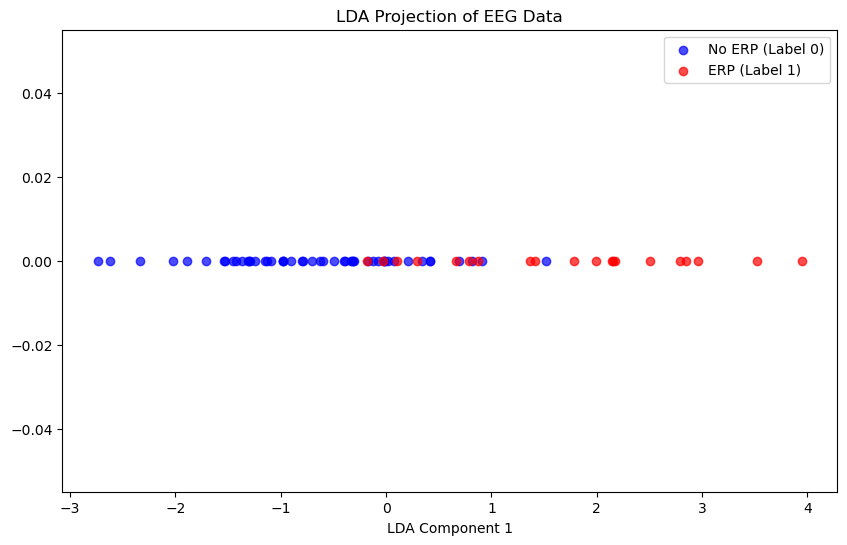

In [3]:
# Load the EEG dataset
eeg_dataset = pd.read_csv('C:/Users/LENOVO/Downloads/eeg_dataset (1).csv')

# Separate features and labels
X = eeg_dataset.drop(columns=['Label']).values  # EEG signals
y = eeg_dataset['Label'].values  # Labels (1 for ERP, 0 for no ERP)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(n_components=1)  # 1 component for 2-class separation
X_train_lda = lda.fit_transform(X_train, y_train)  # Transform training data
X_test_lda = lda.transform(X_test)  # Transform test data

# Plotting the LDA projection for training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), 
            color='blue', alpha=0.7, label='No ERP (Label 0)')
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), 
            color='red', alpha=0.7, label='ERP (Label 1)')
plt.title("LDA Projection of EEG Data")
plt.xlabel("LDA Component 1")
plt.legend()
plt.show()

1. Training and Test Split: This divides the dataset into training and test sets.
2. LDA Transformation: LDA projects the data into one dimension (since it's a binary classification problem) that maximizes separation between classes.
3. Plotting: This visualizes the transformed training data, showing the two classes along the LDA component.
                                                                 
The scatter plot should display a clear separation (if present) between ERPs and non-ERPs along the LDA component axis.

After applying LDA, we can sort the transformed data by class (ERP and non-ERP) and examine the most discriminative features. Sorting helps identify clear boundaries between the classes and separate them based on the LDA component.

Here's how you can proceed:

1. Transform Data with LDA: Use the LDA component values for sorting and separation.
2. Sort and Separate: Sort the LDA-transformed values for each class separately.
3. Identify Key Features: Identify the most significant features contributing to class separation.
    
Explanation

a. LDA Transformation: X_lda contains the transformed LDA values for the entire dataset.
b. Class Separation: The sorted LDA values for ERP (lda_erp_sorted) and non-ERP (lda_non_erp_sorted) show the separation in the LDA space.
c. Top Contributing Features: The LDA coefficients help identify the features that contribute most to class separation, based on their absolute values.
    
This approach visually clarifies the boundary between classes and lists the top features contributing to LDA separation.

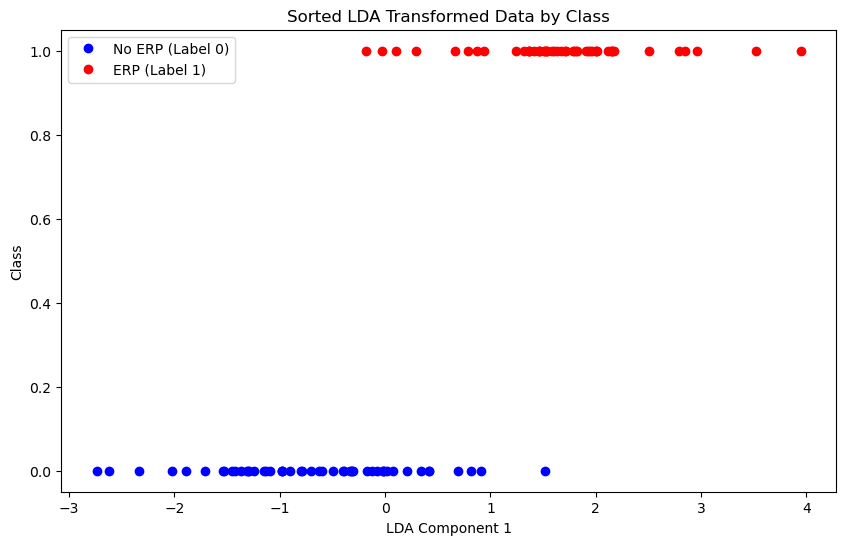

Top 10 Features contributing to class separation:
1. Feature 767 (Coefficient: -0.15101715714546166)
2. Feature 902 (Coefficient: -0.14658851499410827)
3. Feature 701 (Coefficient: -0.1391407059917518)
4. Feature 389 (Coefficient: 0.13303938048604555)
5. Feature 484 (Coefficient: 0.1277667173596746)
6. Feature 485 (Coefficient: 0.12632292345718513)
7. Feature 433 (Coefficient: 0.1249877043799889)
8. Feature 312 (Coefficient: 0.12024577601092967)
9. Feature 452 (Coefficient: 0.1199634446398607)
10. Feature 629 (Coefficient: 0.11867193521522704)


In [4]:
# Transform the entire dataset using the trained LDA model
X_lda = lda.transform(X)

# Separate LDA-transformed data by class
lda_erp = X_lda[y == 1]  # ERP class (Label 1)
lda_non_erp = X_lda[y == 0]  # Non-ERP class (Label 0)

# Sort the transformed LDA values within each class
lda_erp_sorted = np.sort(lda_erp, axis=0)
lda_non_erp_sorted = np.sort(lda_non_erp, axis=0)

# Plot the sorted LDA values for each class to see separation
plt.figure(figsize=(10, 6))
plt.plot(lda_non_erp_sorted, np.zeros_like(lda_non_erp_sorted), 'bo', label="No ERP (Label 0)")
plt.plot(lda_erp_sorted, np.ones_like(lda_erp_sorted), 'ro', label="ERP (Label 1)")
plt.title("Sorted LDA Transformed Data by Class")
plt.xlabel("LDA Component 1")
plt.ylabel("Class")
plt.legend()
plt.show()

# Identify key features by examining LDA coefficients
lda_coefficients = lda.coef_[0]
top_features_indices = np.argsort(np.abs(lda_coefficients))[::-1][:10]  # Top 10 contributing features
top_features = [f'Feature {i}' for i in top_features_indices]

print("Top 10 Features contributing to class separation:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature} (Coefficient: {lda_coefficients[top_features_indices[i]]})")

# Visualize EEG signals
ERP and Non-ERP Selection: The code selects the first examples of ERP (labels == 1) and non-ERP (labels == 0).

1. Plotting: It plots the ERP and non-ERP signals on separate subplots.
2. Annotations: Lines at 300ms, 400ms, and 500ms mark the characteristic peaks associated with ERPs.

This code will produce the EEG graphs displaying the ERP patterns for the specified error and non-error cases.

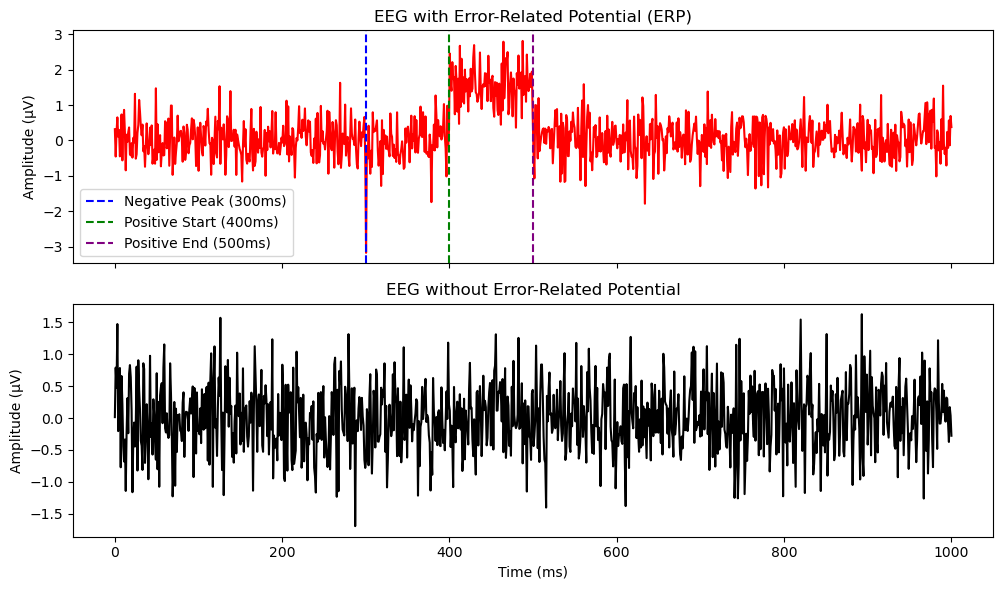

In [5]:
# Load the EEG dataset (replace 'eeg_dataset.csv' with the actual file path if needed)
eeg_dataset = pd.read_csv('C:/Users/LENOVO/Downloads/eeg_dataset (1).csv')

# Separate the data and labels
eeg_data = eeg_dataset.drop(columns=['Label']).values  # EEG signals
labels = eeg_dataset['Label'].values  # Labels (1 for ERP, 0 for no ERP)

# Define parameters
sampling_rate = 1000  # in Hz
duration = 1.0  # duration in seconds
time = np.linspace(0, duration, int(sampling_rate * duration))  # Time axis in seconds
time_ms = time * 1000  # Convert time to milliseconds

# Select sample indices for ERP and non-ERP examples
erp_index = np.where(labels == 1)[0][0]  # First ERP example
non_erp_index = np.where(labels == 0)[0][0]  # First non-ERP example

# Plot ERP and non-ERP signals
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot an example ERP signal (error)
erp_example = eeg_data[erp_index]
ax[0].plot(time_ms, erp_example, color="red")
ax[0].set_title("EEG with Error-Related Potential (ERP)")
ax[0].set_ylabel("Amplitude (µV)")
ax[0].axvline(x=300, color='blue', linestyle='--', label='Negative Peak (300ms)')
ax[0].axvline(x=400, color='green', linestyle='--', label='Positive Start (400ms)')
ax[0].axvline(x=500, color='purple', linestyle='--', label='Positive End (500ms)')
ax[0].legend()

# Plot a non-ERP signal (no error)
non_erp_example = eeg_data[non_erp_index]
ax[1].plot(time_ms, non_erp_example, color="black")
ax[1].set_title("EEG without Error-Related Potential")
ax[1].set_xlabel("Time (ms)")
ax[1].set_ylabel("Amplitude (µV)")

plt.tight_layout()
plt.show()

Displaying the First 5 eeg signals 

In [6]:
# Load the EEG dataset
eeg_dataset = pd.read_csv('C:/Users/LENOVO/Downloads/eeg_dataset (1).csv')

# Display ERP status for the first 5 samples
for i in range(5):
    label = eeg_dataset.loc[i, 'Label']
    status = "Error-Related Potential (ERP)" if label == 1 else "No ERP"
    print(f"Patient {i+1}: {status}")


Patient 1: Error-Related Potential (ERP)
Patient 2: No ERP
Patient 3: No ERP
Patient 4: No ERP
Patient 5: Error-Related Potential (ERP)


Ploting the first 5 EEG signals graph and displaying if ErrP is found

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


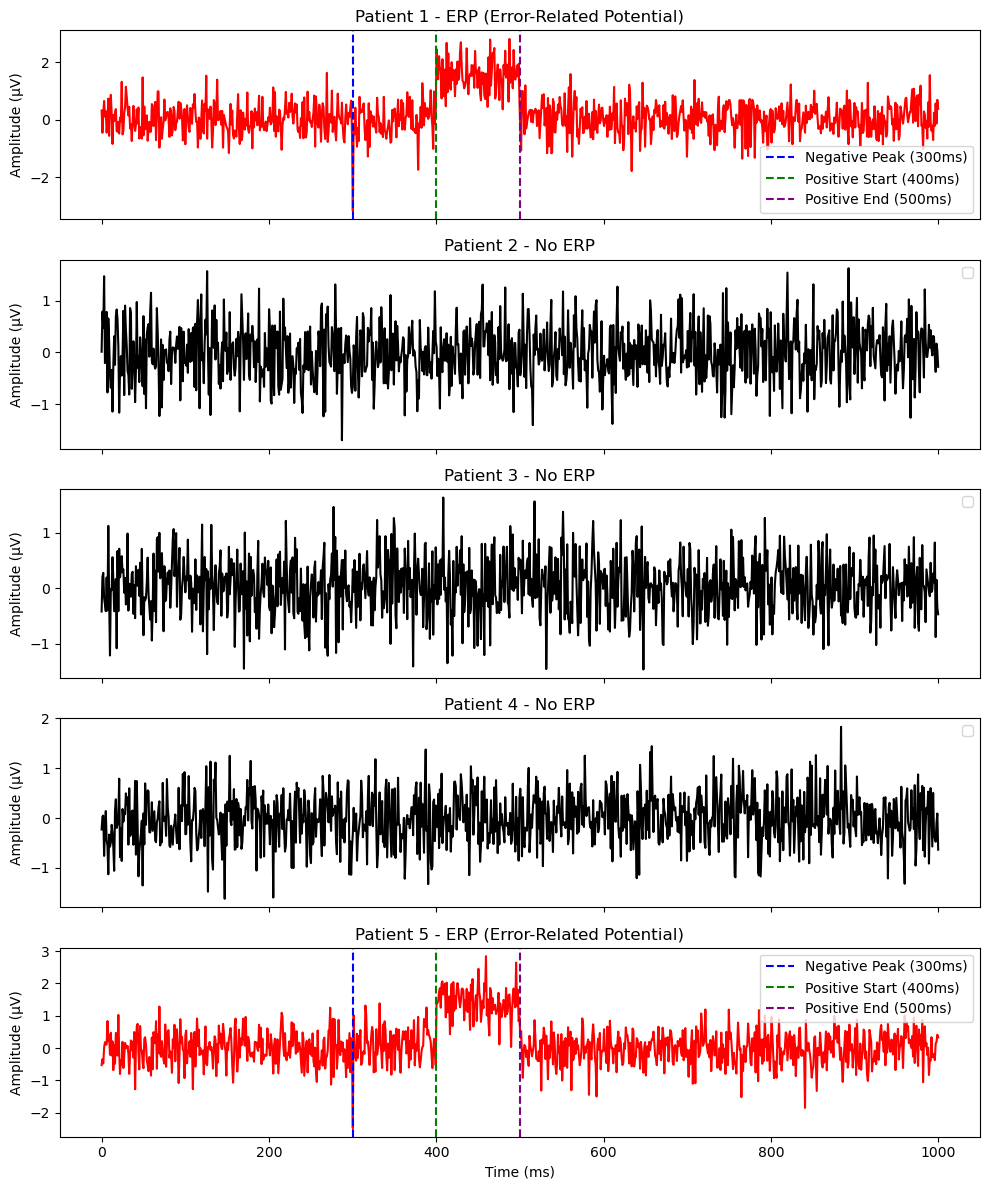

In [7]:
# Load the EEG dataset
eeg_dataset = pd.read_csv('C:/Users/LENOVO/Downloads/eeg_dataset (1).csv')

# Separate the data and labels
eeg_data = eeg_dataset.drop(columns=['Label']).values  # EEG signals
labels = eeg_dataset['Label'].values  # Labels (1 for ERP, 0 for no ERP)

# Define parameters
sampling_rate = 1000  # in Hz
duration = 1.0  # duration in seconds
time = np.linspace(0, duration, int(sampling_rate * duration))  # Time axis in seconds
time_ms = time * 1000  # Convert time to milliseconds

# Select the first 5 patient indices
patient_indices = np.arange(5)  # Assuming the first 5 rows correspond to the 5 patients

# Plot ERP and non-ERP signals for the first 5 patients
fig, ax = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

for i in patient_indices:
    # Select ERP or non-ERP example based on label for each patient
    patient_data = eeg_data[i]
    label = labels[i]

    if label == 1:
        # ERP signal (error)
        ax[i].plot(time_ms, patient_data, color="red")
        ax[i].set_title(f"Patient {i+1} - ERP (Error-Related Potential)")
        ax[i].axvline(x=300, color='blue', linestyle='--', label='Negative Peak (300ms)')
        ax[i].axvline(x=400, color='green', linestyle='--', label='Positive Start (400ms)')
        ax[i].axvline(x=500, color='purple', linestyle='--', label='Positive End (500ms)')
    else:
        # Non-ERP signal (no error)
        ax[i].plot(time_ms, patient_data, color="black")
        ax[i].set_title(f"Patient {i+1} - No ERP")
    
    ax[i].set_ylabel("Amplitude (µV)")
    ax[i].legend()

# Common x-axis label
ax[4].set_xlabel("Time (ms)")

plt.tight_layout()
plt.show()